# Community detection

This notebook aims to apply community detection algorithms on the different networks, and perform some analysis on communities relating to the GWAS approaches' assocation values

In [1]:
import os,sys
os.chdir(os.path.expanduser('~/capstone-project'))
sys.path.append('src')

import networkx as nx
import pandas as pd
import random

import network_analysis
import gene_associations

species='Escherichia_coli'

G_streptomycin = nx.read_graphml(f'results/{species}_streptomycin/{species}_streptomycin_LOR_assoc.graphml')
G_sulfamethoxazole = nx.read_graphml(f'results/{species}_sulfamethoxazole/{species}_sulfamethoxazole_LOR_assoc.graphml')
G_tetracycline = nx.read_graphml(f'results/{species}_tetracycline/{species}_tetracycline_LOR_assoc.graphml')
G_cefalothin = nx.read_graphml(f'results/{species}_cefalothin/{species}_cefalothin_LOR_assoc.graphml')
G_trimethoprim= nx.read_graphml(f'results/{species}_trimethoprim/{species}_trimethoprim_LOR_assoc.graphml')
G_amoxicillin = nx.read_graphml(f'results/{species}_amoxicillin/{species}_amoxicillin_LOR_assoc.graphml')
G_ampicillin = nx.read_graphml(f'results/{species}_ampicillin/{species}_ampicillin_LOR_assoc.graphml')
G_levofloxacin = nx.read_graphml(f'results/{species}_levofloxacin/{species}_levofloxacin_LOR_assoc.graphml')
G_ciprofloxacin = nx.read_graphml(f'results/{species}_ciprofloxacin/{species}_ciprofloxacin_LOR_assoc.graphml')

G_dict ={
    'Streptomycin': G_streptomycin,
    'Sulfamethoxazole': G_sulfamethoxazole,
    'Tetracycline': G_tetracycline,
    'Cefalothin': G_cefalothin,
    'Trimethoprim': G_trimethoprim,
    'Amoxicillin': G_amoxicillin,
    'Ampicillin': G_ampicillin,
    'Levofloxacin': G_levofloxacin,
    'Ciprofloxacin': G_ciprofloxacin
}

drugs = list(G_dict.keys())

In [69]:
df_dict = {}
for drug in drugs:
    drug=drug.lower() 
    df_dict[drug] = pd.read_csv(f'results/{species}_{drug}/{species}_{drug}_ARGs_all.csv', index_col=0)
    df_dict[drug].index = [f'{index} ({drug})' for index in df_dict[drug].index]
# concat all dfs in df_dict having the same colnames
dfs = [df for df in df_dict.values()]
df = pd.concat(dfs, axis=0, join='inner')
df.to_csv(f'results/{species}_all_ARGs.csv')
df = df[(df.iloc[:,0:4]<100).any(axis=1)]
df.to_csv(f'results/{species}_all_ARGs_filtered_top100.csv')

In [62]:
df_dict = {}
for drug in drugs:
    drug=drug.lower() 
    df_dict[drug] = pd.read_csv(f'results/{species}_{drug}/{species}_{drug}_ARGs_all.csv', index_col=0)


In [63]:
# concat all dfs in df_dict having the same colnames
dfs = [df for df in df_dict.values()]
df = pd.concat(dfs, axis=0, join='inner')
df.to_csv(f'results/{species}_all_ARGs.csv')

In [65]:
# filter out all those where no number <50 is present in the 1st 3 cols
df = df[(df.iloc[:,0:4]<50).any(axis=1)]
df.shape
# df.to_csv(f'results/{species}_all_ARGs_filtered_top50.csv')

## Louvain

In [2]:
def get_best_community_split(G, num_of_trials=10, net_name=''):
    '''
    This function takes in a graph and n, it splits the graph into communities using louvain & n different seeds
    the split with the highest modularity is taken

    param:
    -----
    - G: nx.Graph
    - num_of_trials: int (optional - default 10)
    - net_name: str (optional)

    return:
    -----
    - best_split: dict
    - best_seed: int
    '''
    seeds = random.sample(range(1000), num_of_trials)
    best_split = {}; best_Q=0;best_seed=seeds[0]

    for s in seeds:
        split = nx.algorithms.community.louvain_communities(G, seed=s)
        Q = nx.algorithms.community.quality.modularity(G, split)
        print(f'-- {net_name} seed: {s} modularity: {Q}')

        if Q > best_Q:
            best_Q = Q
            best_split = split
            best_seed = s
                    
    print(f'\n-- {net_name} best seed: {best_seed} modularity: {best_Q}')
    return best_split, best_seed

streptomycin_split = get_best_community_split(G_streptomycin, num_of_trials=10, net_name='Streptomycin')
streptomycin_com = streptomycin_split[0]

-- Streptomycin seed: 584 modularity: 0.826092843973986
-- Streptomycin seed: 899 modularity: 0.8260969780629175
-- Streptomycin seed: 948 modularity: 0.8262043934291476
-- Streptomycin seed: 511 modularity: 0.8261184148014172
-- Streptomycin seed: 320 modularity: 0.8260565247136508
-- Streptomycin seed: 439 modularity: 0.8261524846051811
-- Streptomycin seed: 764 modularity: 0.8258982854310966
-- Streptomycin seed: 450 modularity: 0.8259145949099586
-- Streptomycin seed: 690 modularity: 0.8258238430127072
-- Streptomycin seed: 661 modularity: 0.8263472073981944

-- Streptomycin best seed: 661 modularity: 0.8263472073981944


In [109]:
def get_communities_stats(communities):
    '''
    This function takes in a list of communities and returns the number of communities and the number of nodes in each community

    param:
    -----
    - communities: list

    return:
    -----
    - num_communities: int
    - community_sizes: list
    '''
    num_communities = len(communities)
    community_sizes = [len(c) for c in communities]
    # print(f'Number of communities: {num_communities}')
    # print(f'Community sizes: {community_sizes}')
    return num_communities, community_sizes

streptomycin_list=get_communities_stats(streptomycin_split[0])[1]
for i in range(len(streptomycin_list)):
    if streptomycin_list[i] > 10:
        print(f'Community {i+1} has {streptomycin_list[i]} nodes')

Community 1 has 233 nodes
Community 3 has 113 nodes
Community 4 has 152 nodes
Community 5 has 46 nodes
Community 6 has 350 nodes
Community 7 has 104 nodes
Community 8 has 21 nodes
Community 9 has 135 nodes
Community 10 has 285 nodes
Community 11 has 249 nodes
Community 12 has 303 nodes
Community 14 has 397 nodes
Community 15 has 431 nodes
Community 16 has 251 nodes
Community 17 has 11 nodes
Community 18 has 149 nodes
Community 19 has 217 nodes
Community 20 has 24 nodes
Community 22 has 204 nodes
Community 23 has 276 nodes
Community 24 has 135 nodes
Community 27 has 116 nodes
Community 30 has 170 nodes
Community 31 has 65 nodes
Community 38 has 98 nodes


In [3]:
def get_cluster_LOR(cluster_name, G=G_streptomycin, drug='streptomycin'):
    '''
    This function takes in a cluster name and a graph and returns the LOR of the cluster

    param:
    -----
    - cluster_name: str
    - G: nx.Graph

    return:
    -----
    - cluster_LOR: float
    '''
    cluster_LOR = G.nodes[cluster_name][f'log_odds_{drug}_resistance']
    return cluster_LOR

def binarize_LOR(lor):
    '''
    This function takes in a LOR and returns 1 if the LOR is greater than 0 and 0 otherwise

    param:
    -----
    - lor: float

    return:
    -----
    - binary_lor: int
    '''
    binary_lor = 1 if lor > 0 else 0
    return binary_lor

binarize_LOR(get_cluster_LOR('Cluster 10314'))

1

In [136]:
import networkx as nx
from sklearn.metrics import homogeneity_score
from networkx.algorithms.community import louvain_communities

# Example network and attribute setup
G = nx.karate_club_graph()
# Assume that each node has a continuous attribute 'value'
for node in G.nodes:
    G.nodes[node]['value'] = node % 10  # Example attribute
    # print(node)

# Detect communities using the Louvain method
communities = louvain_communities(G, seed=42)  # You can specify a seed for reproducibility

# Create a mapping of node to community
community_map = {}
for community_id, community in enumerate(communities):
    for node in community:
        community_map[node] = community_id

# Extract node attributes and community labels
attribute_values = [G.nodes[node]['value'] for node in G.nodes]
community_labels = [community_map[node] for node in G.nodes]

# print(attribute_values)
# print(community_labels)

# Calculate homogeneity score
homogeneity = homogeneity_score(attribute_values, community_labels)
print(f"Homogeneity Score: {homogeneity}")


Homogeneity Score: 0.19931970304881244


In [5]:
streptomycin_seed=get_best_community_split(G_streptomycin, num_of_trials=10, net_name='Streptomycin')[1]
sulfamethoxazole_seed=get_best_community_split(G_sulfamethoxazole, num_of_trials=10, net_name='Sulfamethoxazole')[1]
tetracycline_seed=get_best_community_split(G_tetracycline, num_of_trials=10, net_name='Tetracycline')[1]
cefalothin_seed=get_best_community_split(G_cefalothin, num_of_trials=10, net_name='Cefalothin')[1]
trimethoprim_seed=get_best_community_split(G_trimethoprim, num_of_trials=10, net_name='Trimethoprim')[1]
amoxicillin_seed=get_best_community_split(G_amoxicillin, num_of_trials=10, net_name='Amoxicillin')[1]
ampicillin_seed=get_best_community_split(G_ampicillin, num_of_trials=10, net_name='Ampicillin')[1]
levofloxacin_seed=get_best_community_split(G_levofloxacin, num_of_trials=10, net_name='Levofloxacin')[1]
ciprofloxacin_seed=get_best_community_split(G_ciprofloxacin, num_of_trials=10, net_name='Ciprofloxacin')[1]

-- Streptomycin seed: 39 modularity: 0.8258753825946952
-- Streptomycin seed: 964 modularity: 0.8261148426966743
-- Streptomycin seed: 887 modularity: 0.8262147763896602
-- Streptomycin seed: 42 modularity: 0.8256057090911123
-- Streptomycin seed: 771 modularity: 0.8261523719968902
-- Streptomycin seed: 839 modularity: 0.8262623187228579
-- Streptomycin seed: 498 modularity: 0.8257795827002077
-- Streptomycin seed: 285 modularity: 0.8260113825329051
-- Streptomycin seed: 493 modularity: 0.8262599371219881
-- Streptomycin seed: 163 modularity: 0.8260974020360814

-- Streptomycin best seed: 839 modularity: 0.8262623187228579
-- Sulfamethoxazole seed: 611 modularity: 0.8134282834150731
-- Sulfamethoxazole seed: 714 modularity: 0.8132383619157606
-- Sulfamethoxazole seed: 170 modularity: 0.8132570281856087
-- Sulfamethoxazole seed: 454 modularity: 0.8134191015380259
-- Sulfamethoxazole seed: 161 modularity: 0.8135507217028362
-- Sulfamethoxazole seed: 40 modularity: 0.8136220162552951
-- S

In [11]:
from sklearn.metrics import homogeneity_score

def get_homogeneity_louvain(G, s, drug, approach='log_odds'):

    if approach == 'log_odds':
        approach = f'log_odds_{drug}_resistance'
    elif approach.lower() == 'anova':
        approach = f'Anova_corrected_pval'
    elif approach.lower() == 'chi2':
        approach = f'chi2_corrected_pval'
    elif approach.upper() == 'MI':
        approach = f'MI'

    communities = nx.algorithms.community.louvain_communities(G, seed=s)  # You can specify a seed for reproducibility

    community_map = {}
    for community_id, community in enumerate(communities):
        for node in community:
            community_map[node] = community_id

    attribute_values = [G.nodes[node][approach] for node in G.nodes]
    attribute_values = [1 if value > 0.5 else 0 for value in attribute_values]  # Convert positive values to 1 and negative values to 0

    community_labels = [community_map[node] for node in G.nodes]

    # print(f"Attribute values: {attribute_values}")
    # print(f"Community labels: {community_labels}")
    # print(len(community_labels), len(attribute_values)) 

    # Calculate homogeneity score
    homogeneity = homogeneity_score(attribute_values, community_labels)
    print(f"Homogeneity Score for {drug} (seed={s}): {homogeneity}")
    return homogeneity

def get_homogeneity_GN(G, s, drug, approach='log_odds'):

    if approach == 'log_odds':
        approach = f'log_odds_{drug}_resistance'
    elif approach.lower() == 'anova':
        approach = f'Anova_corrected_pval'
    elif approach.lower() == 'chi2':
        approach = f'chi2_corrected_pval'
    elif approach.upper() == 'MI':
        approach = f'MI'

    communities = nx.algorithms.community.label_propagation.label_propagation_communities(G ) # You can specify a seed for reproducibility

    community_map = {}
    for community_id, community in enumerate(communities):
        for node in community:
            community_map[node] = community_id

    attribute_values = [G.nodes[node][approach] for node in G.nodes]
    attribute_values = [1 if value > 0.5 else 0 for value in attribute_values]  # Convert positive values to 1 and negative values to 0

    community_labels = [community_map[node] for node in G.nodes]

    # print(f"Attribute values: {attribute_values}")
    # print(f"Community labels: {community_labels}")
    # print(len(community_labels), len(attribute_values)) 

    # Calculate homogeneity score
    homogeneity = homogeneity_score(attribute_values, community_labels)
    print(f"Homogeneity Score for {drug} (seed={s}): {homogeneity}")
    return homogeneity


print('--louvain--')
streptomycin_homogeneity=get_homogeneity_louvain(G_streptomycin, streptomycin_seed, 'streptomycin')
sulfamethoxazole_homogeneity=get_homogeneity_louvain(G_sulfamethoxazole, sulfamethoxazole_seed, 'sulfamethoxazole')
tetracycline_homogeneity=get_homogeneity_louvain(G_tetracycline, tetracycline_seed, 'tetracycline')
cefalothin_homogeneity=get_homogeneity_louvain(G_cefalothin, cefalothin_seed, 'cefalothin')
trimethoprim_homogeneity=get_homogeneity_louvain(G_trimethoprim, trimethoprim_seed, 'trimethoprim')
amoxicillin_homogeneity=get_homogeneity_louvain(G_amoxicillin, amoxicillin_seed, 'amoxicillin')
ampicillin_homogeneity=get_homogeneity_louvain(G_ampicillin, ampicillin_seed, 'ampicillin')
levofloxacin_homogeneity=get_homogeneity_louvain(G_levofloxacin, levofloxacin_seed, 'levofloxacin')
ciprofloxacin_homogeneity=get_homogeneity_louvain(G_ciprofloxacin, ciprofloxacin_seed, 'ciprofloxacin')

print('-- label propagation --')

streptomycin_homogeneity_GN=get_homogeneity_GN(G_streptomycin, streptomycin_seed, 'streptomycin')
sulfamethoxazole_homogeneity_GN=get_homogeneity_GN(G_sulfamethoxazole, sulfamethoxazole_seed, 'sulfamethoxazole')
tetracycline_homogeneity_GN=get_homogeneity_GN(G_tetracycline, tetracycline_seed, 'tetracycline')
cefalothin_homogeneity_GN=get_homogeneity_GN(G_cefalothin, cefalothin_seed, 'cefalothin')
trimethoprim_homogeneity_GN=get_homogeneity_GN(G_trimethoprim, trimethoprim_seed, 'trimethoprim')
amoxicillin_homogeneity_GN=get_homogeneity_GN(G_amoxicillin, amoxicillin_seed, 'amoxicillin')
ampicillin_homogeneity_GN=get_homogeneity_GN(G_ampicillin, ampicillin_seed, 'ampicillin')
levofloxacin_homogeneity_GN=get_homogeneity_GN(G_levofloxacin, levofloxacin_seed, 'levofloxacin')
ciprofloxacin_homogeneity_GN=get_homogeneity_GN(G_ciprofloxacin, ciprofloxacin_seed, 'ciprofloxacin')

--louvain--
Homogeneity Score for streptomycin (seed=839): 0.17631373655162563
Homogeneity Score for sulfamethoxazole (seed=40): 0.0889398351001113
Homogeneity Score for tetracycline (seed=539): 0.23316924743305492
Homogeneity Score for cefalothin (seed=520): 0.2703482986922702
Homogeneity Score for trimethoprim (seed=343): 0.18092695833939496
Homogeneity Score for amoxicillin (seed=990): 0.46522419642057233
Homogeneity Score for ampicillin (seed=296): 0.34225204761454037
Homogeneity Score for levofloxacin (seed=716): 0.16739540125487223
Homogeneity Score for ciprofloxacin (seed=13): 0.4210368542545877
-- label propagation --
Homogeneity Score for streptomycin (seed=839): 0.24899525914952023
Homogeneity Score for sulfamethoxazole (seed=40): 0.2225090693067487
Homogeneity Score for tetracycline (seed=539): 0.3770791816732054
Homogeneity Score for cefalothin (seed=520): 0.3995650819568064
Homogeneity Score for trimethoprim (seed=343): 0.334795160096646
Homogeneity Score for amoxicillin (

In [ ]:
from sklearn.metrics import homogeneity_score



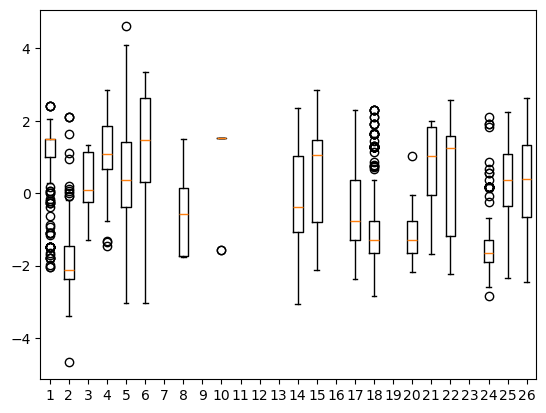

In [89]:
mi_all=[];chi2_p_all=[];anova_p_all=[];log_odds_all=[]
for c in streptomycin_split[0]:
    # c is a set of nodes btw..
    if len(c) > 10:
        mi=[];chi2_p=[];anova_p=[];log_odds=[]
        for cluster in c:
            # mi.append(G_streptomycin.nodes(data=True)[cluster]['MI'])
            # chi2_p.append(G_streptomycin.nodes(data=True)[cluster]['log_odds_streptomycin_resistance'])
            # anova_p.append(G_streptomycin.nodes(data=True)[cluster]['Anova_corrected_pval'])
            log_odds.append(G_streptomycin.nodes(data=True)[cluster]['log_odds_streptomycin_resistance'])
        # mi_all.append(mi)
        # chi2_p_all.append(chi2_p)
        # anova_p_all.append(anova_p)
        log_odds_all.append(log_odds)

# for each array in mi plot boxplot
import matplotlib.pyplot as plt
# plt.boxplot(mi_all)
# plt.show()

# plt.boxplot(chi2_p_all)
# plt.show()

# plt.boxplot(anova_p_all)
# plt.show()

plt.boxplot(log_odds_all)
plt.show()

## robustness analysis



In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


def robustness_analysis(G, perturbation_type='node', removal_fraction=0.1, num_iterations=100, random_seed=None, title='Robustness analysis'):
    """
    Perform robustness analysis on a network by systematically removing nodes or edges.

    Parameters:
    - G: networkx.Graph
        The input network.
    - perturbation_type: str
        The type of perturbation ('node' or 'edge').
    - removal_fraction: float
        The fraction of nodes or edges to remove in each iteration.
    - num_iterations: int
        The number of iterations for the robustness analysis.
    - random_seed: int
        Seed for random number generator for reproducibility.

    Returns:
    - robustness_results: list of float
        The largest connected component size after each iteration.
    """
    if perturbation_type not in ['node', 'edge']:
        raise ValueError("perturbation_type must be 'node' or 'edge'")

    np.random.seed(random_seed)
    G_copy = G.copy()

    robustness_results = []

    for _ in range(num_iterations):
        num_elements = G_copy.number_of_nodes() if perturbation_type == 'node' else G_copy.number_of_edges()
        elements_to_remove = int(removal_fraction * num_elements)
        elements_to_remove = min(elements_to_remove, num_elements) 

        if perturbation_type == 'node':
            nodes = list(G_copy.nodes())
            nodes_to_remove = np.random.choice(nodes, size=elements_to_remove, replace=False)
            G_copy.remove_nodes_from(nodes_to_remove)
        else:
            edges = list(G_copy.edges())
            edges_to_remove = np.random.choice(len(edges), size=elements_to_remove, replace=False)
            G_copy.remove_edges_from([edges[i] for i in edges_to_remove])

        # Calculate the size of the largest connected component
        largest_cc = max(nx.connected_components(G_copy), key=len)
        robustness_results.append(len(largest_cc))


    fig = go.Figure(data=go.Scatter(x=list(range(len(results))), y=results, line=dict(color='#E43C42')))
    fig.update_layout(title=title,
                    xaxis_title='Iteration',
                    yaxis_title='Size of largest connected component',
                    autosize=False,
                    width=800,
                    height=800)
    fig.show()

    return robustness_results   

G=G_streptomycin
results = robustness_analysis(G, perturbation_type='node', removal_fraction=0.1, num_iterations=20, random_seed=42, title='Streptomycin network node attack')

G=G_streptomycin
results = robustness_analysis(G, perturbation_type='edge', removal_fraction=0.1, num_iterations=20, random_seed=42)

In [15]:
results

[4037,
 3590,
 3203,
 2838,
 2528,
 2245,
 1993,
 1774,
 1564,
 1389,
 1228,
 1068,
 944,
 850,
 743,
 657,
 556,
 481,
 366,
 322]

## real

In [90]:
#-- intra-cluster correlation

import numpy as np

def calculate_intra_cluster_correlations(G, clusters, drug='streptomycin'):
    correlations = []
    for cluster in clusters:
        if len(cluster) > 10:
            log_odds = [G.nodes(data=True)[node][f'log_odds_{drug}_resistance'] for node in cluster]
            correlation = np.corrcoef(log_odds)
            correlations.append(correlation)
    return correlations

correlations = calculate_intra_cluster_correlations(G_streptomycin, streptomycin_split[0])

In [107]:
import pandas as pd
import pingouin as pg
from IPython.display import display


def calculate_intra_cluster_correlations(G, clusters):
    count=0
    correlations = []
    for cluster in clusters:
        if len(cluster) > 10:
            log_odds = [G.nodes(data=True)[node]['log_odds_streptomycin_resistance'] for node in cluster]
            df = pd.DataFrame(log_odds, columns=['log_odds'])
            df['community'] = [str(cluster)] * len(log_odds)
            df['node'] = list(range(len(log_odds)))
            # print(f'Community: {count}')
            # display(df)
            icc = pg.intraclass_corr(data=df, targets='community', raters='node', ratings='log_odds').round(3)
            correlations.append(icc.set_index("Type"))
            count+=1
    return correlations

# correlations = calculate_intra_cluster_correlations(G_streptomycin, streptomycin_split[0])

In [105]:
correlations

[                   Description  ICC   F  df1  df2  pval       CI95%
 Type                                                               
 ICC1    Single raters absolute  NaN NaN    0  232   NaN  [nan, nan]
 ICC2      Single random raters  NaN NaN    0    0   NaN  [nan, nan]
 ICC3       Single fixed raters  NaN NaN    0    0   NaN  [nan, nan]
 ICC1k  Average raters absolute  NaN NaN    0  232   NaN  [nan, nan]
 ICC2k    Average random raters  NaN NaN    0    0   NaN  [nan, nan]
 ICC3k     Average fixed raters  NaN NaN    0    0   NaN  [nan, nan],
                    Description  ICC    F  df1  df2  pval       CI95%
 Type                                                                
 ICC1    Single raters absolute  NaN  inf    0  151   NaN  [nan, nan]
 ICC2      Single random raters  NaN  NaN    0    0   NaN  [nan, nan]
 ICC3       Single fixed raters  NaN  NaN    0    0   NaN  [nan, nan]
 ICC1k  Average raters absolute  NaN  inf    0  151   NaN  [nan, nan]
 ICC2k    Average random ra